In [1]:
# test.ipynb

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.preprocessing import image # type: ignore

# Load the trained model
model = load_model('best_model.h5')  # Update the path with your model file


In [2]:

# Function to preprocess a single image
def preprocess_single_image(img_path, target_size=(28, 28)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size, color_mode="grayscale")
    
    # Convert image to numpy array and normalize
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Normalize the image (if required for your model)
    img_array = img_array / 255.0  # Scale pixel values to [0, 1]
    
    return img_array

# Function to predict a single image
def predict_single_image(img_path):
    # Preprocess the image
    img_array = preprocess_single_image(img_path)
    
    # Get the model's prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class[0], prediction[0]

1/1 [==============================] - 4s 4s/step


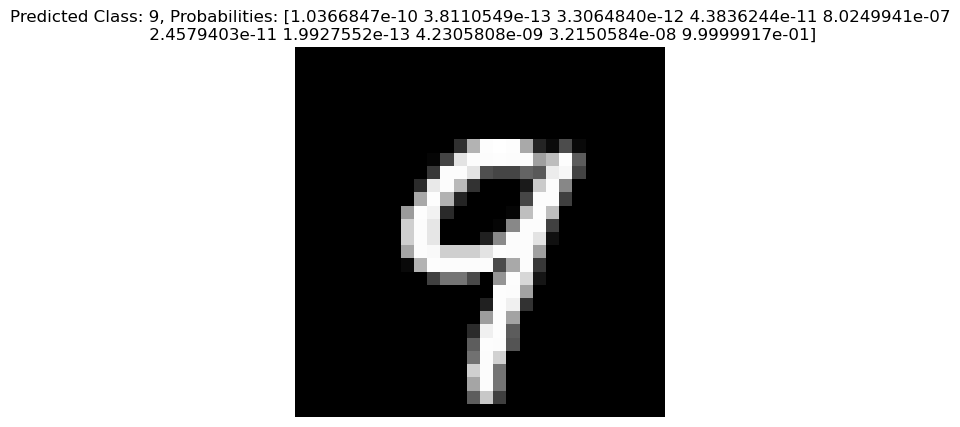

Predicted Class: 9
Class probabilities: [1.0366847e-10 3.8110549e-13 3.3064840e-12 4.3836244e-11 8.0249941e-07
 2.4579403e-11 1.9927552e-13 4.2305808e-09 3.2150584e-08 9.9999917e-01]


In [3]:

# Test the model on a single image
img_path = 'samples/image_13_label_9.png'  # Provide the path to your test image

# Make the prediction
predicted_class, prediction_probs = predict_single_image(img_path)

# Display the image and the prediction
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}, Probabilities: {prediction_probs}')
plt.axis('off')
plt.show()

# Print the prediction
print(f'Predicted Class: {predicted_class}')
print(f'Class probabilities: {prediction_probs}')
